In [1]:
import jax.numpy as jnp
import jax.random as jrandom
import numpy as np
from jax import grad
from jax import jit, grad, jacfwd, jacrev
import math


import scipy 

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [15,15]
plt.style.use('default')
plt.rcParams['lines.markersize'] = 8
plt.rcParams.update({'font.size': 12})


from tqdm import tqdm
import time

from jax.config import config
config.update("jax_enable_x64", True)

import sys
sys.path.append("..")

from Ours import Ours
from FD import FD
from Functions import Quadratic

%load_ext autoreload
%autoreload 2

# 1 D examples 

In [161]:
jrandom_key = jrandom.PRNGKey(0)
D = jnp.array([[1]])

sig = 0.1
jrandom_key, subkey = jrandom.split(jrandom_key)

F = Quadratic(1/2 * D, jnp.zeros(1), 0, sig=sig)

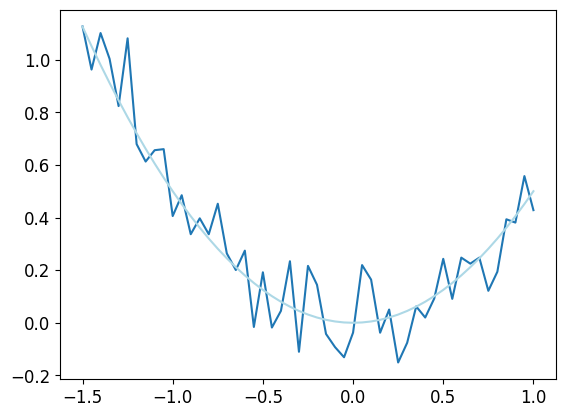

In [162]:
X = jnp.linspace(-1.5, 1, 51)
Y = []
Y_true = []
for x in X:
    jrandom_key, subkey = jrandom.split(jrandom_key)
    Y.append(F.f(jnp.array([x]), subkey))
    Y_true.append(F.f(jnp.array([x])))



plt.plot(X, Y)
plt.plot(X, Y_true, color="lightblue")

plt.savefig("noisy", dpi=500)



In [163]:
X[10]

DeviceArray(-1., dtype=float64)

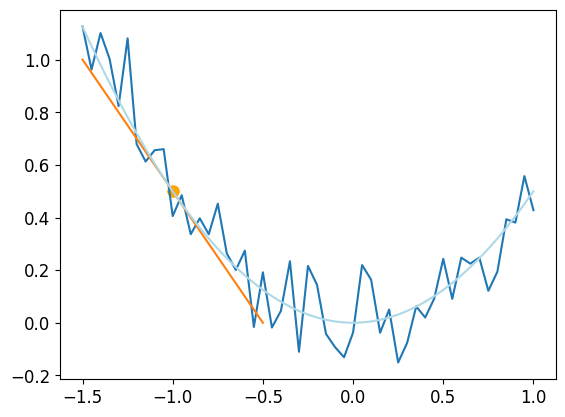

In [164]:
X_grad = jnp.linspace(-1.5, -0.5, 50)
fg = F.f1(jnp.array([-1.]))
Y_grad = [F.f(jnp.array([-1.])) + fg * (x + 1) for x in X_grad]

plt.plot(X, Y)
plt.scatter(jnp.array([-1.]), F.f(jnp.array([-1.])), color='orange')
plt.plot(X_grad, Y_grad)
plt.plot(X, Y_true, color="lightblue")

plt.savefig("true_grad", dpi=500)



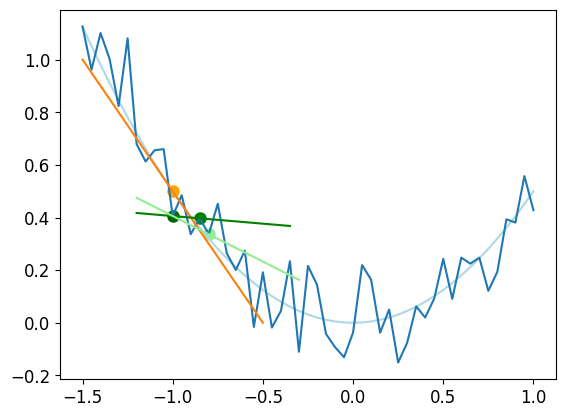

In [178]:


X_1_short = -1
X_1_short_idx = 10

X_2_short_idx = 13
X_2_short = X[X_2_short_idx]

X_3_short_idx = 14
X_3_short = X[X_3_short_idx]



fg_grad_short_2 = (Y[X_2_short_idx] - Y[X_1_short_idx])/(X_2_short - X_1_short)
fg_grad_short_3 = (Y[X_3_short_idx] - Y[X_1_short_idx])/(X_3_short - X_1_short)


X_grad_short_2 = jnp.linspace(-1.2, X_2_short + 0.5)
Y_grad_short_2 = [Y[X_1_short_idx] + fg_grad_short_2 * (x + 1) for x in X_grad_short_2]

X_grad_short_3 = jnp.linspace(-1.2, X_3_short + 0.5)
Y_grad_short_3 = [Y[X_1_short_idx] + fg_grad_short_3 * (x + 1) for x in X_grad_short_3]


plt.plot(X, Y_true, color="lightblue")
plt.plot(X, Y)



plt.plot(X_grad, Y_grad)
plt.plot(X_grad_short_2, Y_grad_short_2, color="green")
plt.plot(X_grad_short_3, Y_grad_short_3, color="lightgreen")

plt.scatter(jnp.array([X_1_short]), Y[X_1_short_idx], color='darkgreen')
plt.scatter(jnp.array([-1.]), F.f(jnp.array([-1.])), color='orange')
plt.scatter(jnp.array([X_2_short]), Y[X_2_short_idx], color='green')
plt.scatter(jnp.array([X_3_short]), Y[X_3_short_idx], color='lightgreen')



plt.savefig("short_grad", dpi=500)

plt.show()






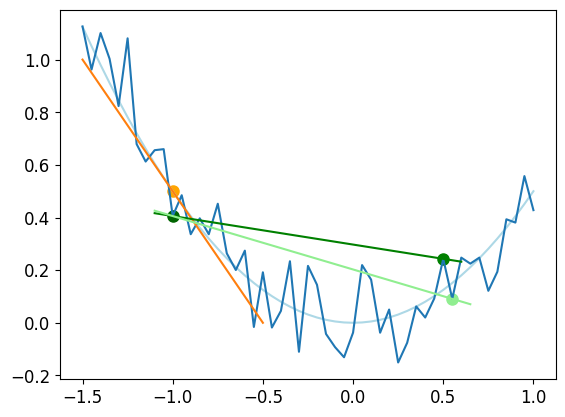

In [179]:
X_1_long = -1
X_1_long_idx = 10
X_2_long_idx = 40
X_2_long = X[X_2_long_idx]

X_3_long_idx = 41
X_3_long = X[X_3_long_idx]



fg_grad_long_2 = (Y[X_2_long_idx] - Y[X_1_long_idx])/(X_2_long - X_1_long)

fg_grad_long_3 = (Y[X_3_long_idx] - Y[X_1_long_idx])/(X_3_long - X_1_long)


X_grad_long_2 = jnp.linspace(-1.1, X_2_long + 0.1)
Y_grad_long_2 = [Y[X_1_long_idx] + fg_grad_long_2 * (x + 1) for x in X_grad_long_2]

X_grad_long_3 = jnp.linspace(-1.1, X_3_long + 0.1)
Y_grad_long_3 = [Y[X_1_long_idx] + fg_grad_long_3 * (x + 1) for x in X_grad_long_3]


plt.plot(X, Y_true, color="lightblue")
plt.plot(X, Y)



plt.plot(X_grad, Y_grad)
plt.plot(X_grad_long_2, Y_grad_long_2, color="green")
plt.plot(X_grad_long_3, Y_grad_long_3, color="lightgreen")

plt.scatter(jnp.array([X_1_short]), Y[X_1_short_idx], color='darkgreen')
plt.scatter(jnp.array([-1.]), F.f(jnp.array([-1.])), color='orange')
plt.scatter(jnp.array([X_2_long]), Y[X_2_long_idx], color='green')
plt.scatter(jnp.array([X_3_long]), Y[X_3_long_idx], color='lightgreen')



plt.savefig("long_grad", dpi=500)

plt.show()





# 3D Plot

In [2]:
import plotly.graph_objects as go


In [22]:
jrandom_key = jrandom.PRNGKey(0)

sig = 0.1
jrandom_key, subkey = jrandom.split(jrandom_key)
Q = jnp.array([[1, 0], [0, 0.5]])


F = Quadratic(Q, jnp.zeros(2), 0, sig=sig)



X = jnp.linspace(-2, 2, 30)
Y = X 
X_mesh, Y_mesh = jnp.meshgrid(X, Y)
positions = np.vstack([X_mesh.ravel(), Y_mesh.ravel()])




Z_true = jnp.array([F.f(x) for x in positions.T]).reshape(len(Y), len(X))
Z_noisy = []
for p in positions.T:
    jrandom_key, subkey = jrandom.split(jrandom_key)
    Z_noisy.append(F.f(p, subkey))
    
Z_noisy = jnp.array(Z_noisy).reshape(len(Y), len(X))

S = jrandom.normal(jrandom_key, shape=[10, 2])
S_vals = []
for p in S:
    jrandom_key, subkey = jrandom.split(jrandom_key)
    S_vals.append(F.f(p, subkey))
    
S_vals = jnp.array(S_vals)

S = S.T
    
simplex_grad = jnp.linalg.inv(S @ S.T) @ S @ S_vals
sg_fs = []

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z_noisy)])
fig.show()


In [20]:
help(jrandom.normal)

Help on function normal in module jax._src.random:

normal(key: Union[Any, jax._src.prng.PRNGKeyArray], shape: Union[Sequence[int], jax.core.NamedShape] = (), dtype: Any = <class 'numpy.float64'>) -> jax._src.numpy.lax_numpy.ndarray
    Sample standard normal random values with given shape and float dtype.
    
    Args:
      key: a PRNG key used as the random key.
      shape: optional, a tuple of nonnegative integers representing the result
        shape. Default ().
      dtype: optional, a float dtype for the returned values (default float64 if
        jax_enable_x64 is true, otherwise float32).
    
    Returns:
      A random array with the specified shape and dtype.



0.02


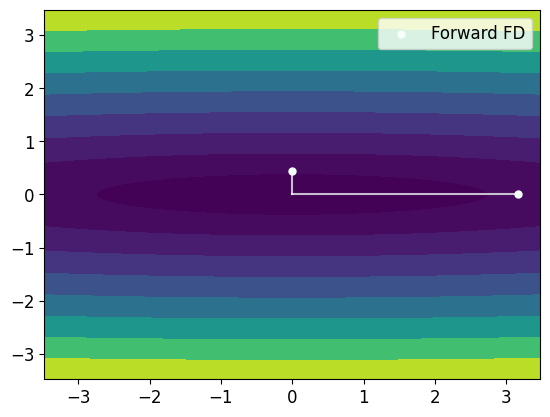

1


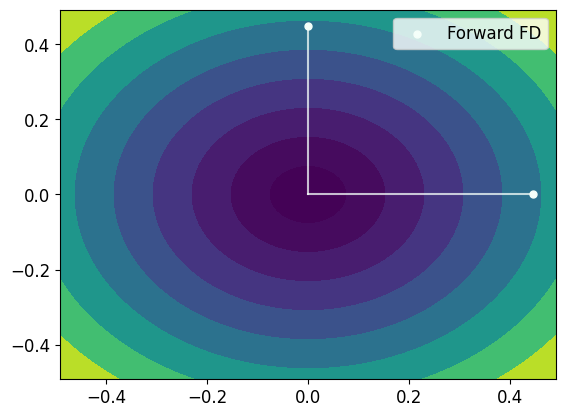

In [25]:
sig = 0.1
jrandom_key = jrandom.PRNGKey(0)

# l = loss_getter(2, 2, D, sig, coeff)
x_0 = jnp.zeros(2)
for a in [0.02, 1]: #jnp.logspace(-3, 1, 10):
    
    print(a)
    
    D = jnp.array([[a, 0], [0, 1]])
    
    jrandom_key, subkey = jrandom.split(jrandom_key)
    
    F = Quadratic(D, b=jnp.zeros(2), c=0, sig=sig)
    
    
    S_FD_getter = FD(sig, is_central=False, h=None, use_H=True)
    
    gd_FD, _, _, _, S_FD = S_FD_getter.grad(F, x_0, subkey, H=F.f2(x_0))

        

    lim = max([jnp.max(jnp.abs(S_FD))*1.1])

    
    X = jnp.linspace(-lim, lim, 100)
    X, Y = jnp.meshgrid(X, X)
    XY = np.vstack([X.ravel(), Y.ravel()])
    Z = jnp.diag(XY.T @ D @ XY).reshape(X.shape[0], Y.shape[0])


    levels = [lev**2 for lev in jnp.linspace(0, jnp.sqrt(lim**2 + a * lim**2), 10)]
    
    cp = plt.contourf(X, Y, Z, levels)
    


    

    plt.scatter(S_FD[0], S_FD[1], color="mintcream", zorder=3, s=25, label="Forward FD")

    
    plt.plot([0, S_FD[0, 0]], [0, S_FD[1, 0]], color="mintcream", alpha=0.75, zorder=2)
    plt.plot([0, S_FD[0, 1]], [0, S_FD[1, 1]], color="mintcream", alpha=0.75, zorder=2)
    





    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    
    plt.legend()


#     plt.savefig("Figures/a_{}_sig_{}_2d_simplex_demo.jpeg".format(a, sig), dpi=500)
    plt.show()
    

